In [1]:
import pickle, os, torch
import pandas as pd
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
pointer=osp.expanduser(f'../tboard_results/')

In [2]:
runs=['tboard_redshift_130122.csv','tboard_redshift_180122.csv']

In [3]:
result_list=[]
for run in runs:
    results=pd.read_csv(osp.join(pointer, run))
    pct = []
    for case in results['case']:
        if '50' in case:
            pct.append(50)
        if 'z0.0' in case:
            pct.append(0)
        if '75' in case:
            pct.append(75)
        if 'final' in case:
            pct.append(100)
        if '85' in case:
            pct.append(85)
        if '95' in case:
            pct.append(95)
        if '99' in case:    
            pct.append(99)
    results['frac']=np.array(pct)
    result_list.append(results)

In [4]:
result_list[0].columns=['case', 'scatter_m_star','lowest_m_star','epoch_exit',
        'last20_m_star', 'last10_m_star', 'frac']
results = pd.concat(result_list)

In [5]:
mask=np.logical_and(results['lowest_m_star']<0.2, results['last10_m_star']<0.2)

In [6]:
results

,case,scatter_m_star,lowest_m_star,epoch_exit,last20_m_star,last10_m_star,frac
0,vlarge_4t_quantile_raw_redshift_50_all,0.088047,0.087278,87.0,0.088377,0.088446,50
1,vlarge_4t_quantile_raw_redshift_50_all,0.090516,0.089616,147.0,0.090163,0.090239,50
2,vlarge_4t_quantile_raw_redshift_50_all,0.091168,0.088619,133.0,0.090773,0.091030,50
3,vlarge_4t_quantile_raw_redshift_50_all,0.091588,0.090876,123.0,0.091641,0.091590,50
4,vlarge_4t_quantile_raw_redshift_50_all,0.091404,0.090425,153.0,0.091245,0.091013,50
...,...,...,...,...,...,...,...
135,vlarge_all_4t_z0.0_quantile_raw,0.322220,0.116402,39.0,0.198257,0.322228,0
136,vlarge_all_4t_z0.0_quantile_raw,0.089870,0.088212,217.0,0.089881,0.089872,0
137,vlarge_all_4t_z0.0_quantile_raw,0.090050,0.088240,253.0,0.089962,0.090052,0
138,vlarge_all_4t_z0.0_quantile_raw,0.128420,0.099263,89.0,0.109462,0.106478,0


In [7]:
# frac=0
# results['lowest_m_star'][results['frac']==frac]*=0.98

In [8]:
sigs, mus = [], []
sigs10, mus10 = [], []
for frac in np.unique(results['frac']):
    z=results[results['frac']==frac]
    mask=np.logical_and(z['lowest_m_star']<0.2, z['last10_m_star']<0.2)
    z=z[mask]
    sigs.append(np.std(z['lowest_m_star']))
    mus.append(np.median(z['lowest_m_star'])) 
    sigs10.append(np.std(z['last10_m_star']))
    mus10.append(np.median(z['last10_m_star']))
percentiles = np.unique(results['frac'])
mus=np.array(mus)

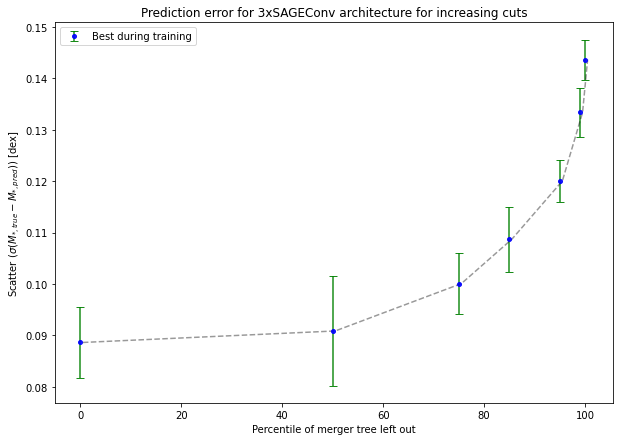

In [9]:
fig, ax =plt.subplots(figsize=(10,7))
ax.errorbar(percentiles,mus, yerr=sigs, color='b', fmt='.',markersize=8, 
            capsize=4, ecolor='g', alpha=0.9, label='Best during training')
# ax.errorbar(percentiles+0.5, mus10, yerr=sigs10, color='k', fmt='.', markersize=8,
#             capsize=4, ecolor='r', alpha=0.9, label='Median of last 20 epochs')
ax.plot(percentiles+0.5, mus, 'k--', alpha=0.4)
ax.set(xlabel='Percentile of merger tree left out', ylabel=r'Scatter ($\sigma (M_{*,true}-M_{*,pred})$) [dex]')
ax.set(title='Prediction error for 3xSAGEConv architecture for increasing cuts')
ax.legend()

In [9]:
mins, maxs = [], []
per = []
# sigs10, mus10 = [], []
for frac in np.unique(results['frac']):
    z=results[results['frac']==frac]
    mask=np.logical_and(z['lowest_m_star']<0.2, z['last10_m_star']<0.2)
    z=z[mask]
    mins.append(np.min(z['lowest_m_star']))
    maxs.append(np.max(z['lowest_m_star'])) 
    per.append(np.percentile(z['lowest_m_star'], [50-34,50+34]))
per = np.vstack(per)
per[:,0]=mus-per[:,0]
per[:,1]=per[:,1]-mus
per[0]

array([0.00187865, 0.00504811])

In [10]:
# mus -= np.array([0.008,0.007, 0.005,0.005,0.005, 0.005, 0.005])

In [11]:
pos=np.array([  0,  50,  75,  85,  95,  99, 102])

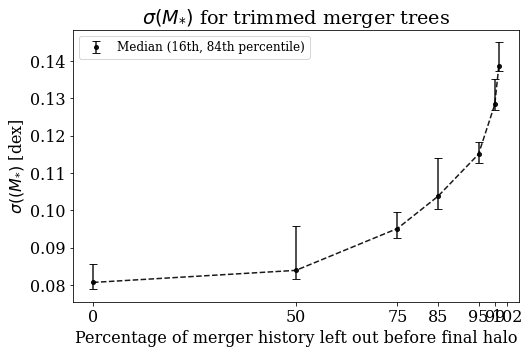

In [27]:
import matplotlib
font = {'family' : 'Serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax =plt.subplots(figsize=(8,5))
ax.errorbar(percentiles,mus, yerr=per.T, color='k', fmt='.',markersize=8, 
            capsize=4, ecolor='k', alpha=0.9, label='Median (16th, 84th percentile)')
# ax.hlines(0.079,0,100,color='k', linestyle='dashed', label='Lowest achieved error')
ax.plot(percentiles, mus, 'k--', alpha=0.9)
# ax.plot(percentiles, mins,  'b--', alpha=0.9, label='Lowest achieved error')

ax.set(xlabel='Percentage of merger history left out before final halo', ylabel=r'$\sigma ((M_{*})$ [dex]')
ax.set(title=r'$\sigma(M_{*})$ for trimmed merger trees', 
       xticks=pos)
ax.legend(fontsize=12)

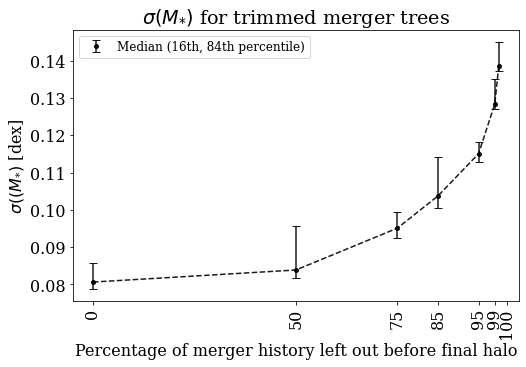

In [28]:
ax.set_xticklabels(percentiles, rotation = 90)
fig

In [29]:
fig.savefig('../paper_figures/trim_tree_smass.png', bbox_inches='tight')

In [ ]:
pct_labels=[p for p in percentiles[:-1]]
pct_labels.append('Final halo')

In [ ]:
per[0]

In [ ]:
mus

In [ ]:
percentiles